<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,56.528000,94.247416,75.501049,23.410216,1322.029317,1581.715997,855.045248,726.670748
1,0.0,1.0,46.368102,27.838937,99.449498,40.694287,-19.007422,205.343402,495.876160,-290.532758
2,0.0,2.0,96.550460,68.083584,80.041918,69.393664,199.340343,523.409970,773.760906,-250.350936
3,0.0,3.0,72.590012,24.992661,32.368985,95.163135,74.942348,310.057141,-84.233061,394.290202
4,0.0,4.0,83.604532,50.060685,71.010949,89.316145,579.066963,883.059274,477.323449,405.735825
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.073054,47.175212,20.080429,44.964655,-389.073952,-243.780604,60.871481,-304.652085
19996,999.0,16.0,84.949583,53.379051,33.696253,52.408663,100.321447,334.754997,365.089222,-30.334225
19997,999.0,17.0,45.666834,58.390134,78.048948,57.672535,-493.894523,-244.116072,230.423960,-474.540032
19998,999.0,18.0,89.361831,78.283658,27.680876,77.458183,1832.709283,2115.493832,1232.393950,883.099882


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    56.528000  94.247416  75.501049  23.410216  1322.029317   
      1.0    46.368102  27.838937  99.449498  40.694287   -19.007422   
      2.0    96.550460  68.083584  80.041918  69.393664   199.340343   
      3.0    72.590012  24.992661  32.368985  95.163135    74.942348   
      4.0    83.604532  50.060685  71.010949  89.316145   579.066963   
...                ...        ...        ...        ...          ...   
999.0 15.0   23.073054  47.175212  20.080429  44.964655  -389.073952   
      16.0   84.949583  53.379051  33.696253  52.408663   100.321447   
      17.0   45.666834  58.390134  78.048948  57.672535  -493.894523   
      18.0   89.361831  78.283658  27.680876  77.458183  1832.709283   
      19.0   53.806006  58.568549  47.349113  34.437644   109.701976   

                       Y        y_hat       e_hat  
rep   index                                        
0.0   0.0    1581.715997   855.045248  726.670748  
      1.0     205.343402   495.876160 -290.532758  
      2.0     523.409970   773.760906 -250.350936  
      3.0     310.057141   -84.233061  394.290202  
      4.0     883.059274   477.323449  405.735825  
...                  ...          ...         ...  
999.0 15.0   -243.780604    60.871481 -304.652085  
      16.0    334.754997   365.089222  -30.334225  
      17.0   -244.116072   230.423960 -474.540032  
      18.0   2115.493832  1232.393950  883.099882  
      19.0    313.863288   -56.201436  370.064724  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    56.528000  94.247416  75.501049  23.410216  1322.029317   
      1.0    46.368102  27.838937  99.449498  40.694287   -19.007422   
      2.0    96.550460  68.083584  80.041918  69.393664   199.340343   
      3.0    72.590012  24.992661  32.368985  95.163135    74.942348   
      4.0    83.604532  50.060685  71.010949  89.316145   579.066963   
...                ...        ...        ...        ...          ...   
999.0 15.0   23.073054  47.175212  20.080429  44.964655  -389.073952   
      16.0   84.949583  53.379051  33.696253  52.408663   100.321447   
      17.0   45.666834  58.390134  78.048948  57.672535  -493.894523   
      18.0   89.361831  78.283658  27.680876  77.458183  1832.709283   
      19.0   53.806006  58.568549  47.349113  34.437644   109.701976   

                       Y        y_hat       e_hat  
rep   index                                        
0.0   0.0    1581.715997   855.045248  726.670748  
      1.0     205.343402   495.876160 -290.532758  
      2.0     523.409970   773.760906 -250.350936  
      3.0     310.057141   -84.233061  394.290202  
      4.0     883.059274   477.323449  405.735825  
...                  ...          ...         ...  
999.0 15.0   -243.780604    60.871481 -304.652085  
      16.0    334.754997   365.089222  -30.334225  
      17.0   -244.116072   230.423960 -474.540032  
      18.0   2115.493832  1232.393950  883.099882  
      19.0    313.863288   -56.201436  370.064724  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,56.528000,94.247416,75.501049,23.410216,1322.029317,1581.715997,855.045248,726.670748
1,0.0,1.0,46.368102,27.838937,99.449498,40.694287,-19.007422,205.343402,495.876160,-290.532758
2,0.0,2.0,96.550460,68.083584,80.041918,69.393664,199.340343,523.409970,773.760906,-250.350936
3,0.0,3.0,72.590012,24.992661,32.368985,95.163135,74.942348,310.057141,-84.233061,394.290202
4,0.0,4.0,83.604532,50.060685,71.010949,89.316145,579.066963,883.059274,477.323449,405.735825
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.073054,47.175212,20.080429,44.964655,-389.073952,-243.780604,60.871481,-304.652085
19996,999.0,16.0,84.949583,53.379051,33.696253,52.408663,100.321447,334.754997,365.089222,-30.334225
19997,999.0,17.0,45.666834,58.390134,78.048948,57.672535,-493.894523,-244.116072,230.423960,-474.540032
19998,999.0,18.0,89.361831,78.283658,27.680876,77.458183,1832.709283,2115.493832,1232.393950,883.099882


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    56.528000  94.247416  75.501049  23.410216  1322.029317   
      1.0    46.368102  27.838937  99.449498  40.694287   -19.007422   
      2.0    96.550460  68.083584  80.041918  69.393664   199.340343   
      3.0    72.590012  24.992661  32.368985  95.163135    74.942348   
      4.0    83.604532  50.060685  71.010949  89.316145   579.066963   
...                ...        ...        ...        ...          ...   
999.0 15.0   23.073054  47.175212  20.080429  44.964655  -389.073952   
      16.0   84.949583  53.379051  33.696253  52.408663   100.321447   
      17.0   45.666834  58.390134  78.048948  57.672535  -493.894523   
      18.0   89.361831  78.283658  27.680876  77.458183  1832.709283   
      19.0   53.806006  58.568549  47.349113  34.437644   109.701976   

                       Y        y_hat       e_hat  
rep   index                                        
0.0   0.0    1581.715997   855.045248  726.670748  
      1.0     205.343402   495.876160 -290.532758  
      2.0     523.409970   773.760906 -250.350936  
      3.0     310.057141   -84.233061  394.290202  
      4.0     883.059274   477.323449  405.735825  
...                  ...          ...         ...  
999.0 15.0   -243.780604    60.871481 -304.652085  
      16.0    334.754997   365.089222  -30.334225  
      17.0   -244.116072   230.423960 -474.540032  
      18.0   2115.493832  1232.393950  883.099882  
      19.0    313.863288   -56.201436  370.064724  

[20000 rows x 8 columns]

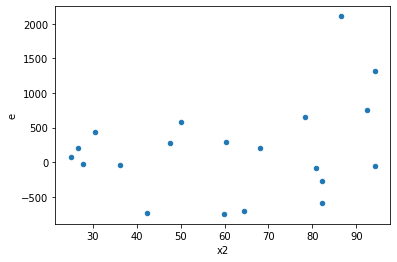

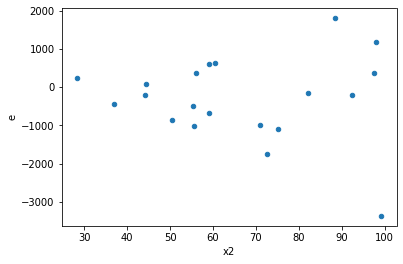

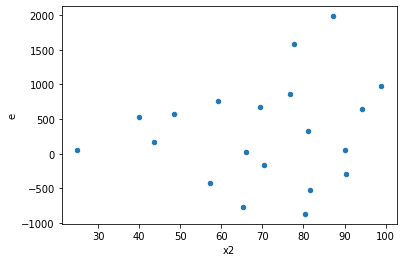

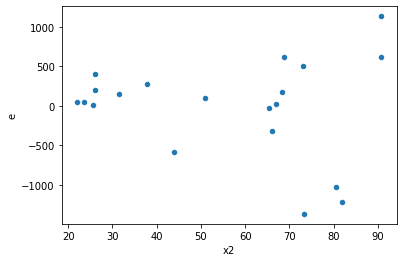

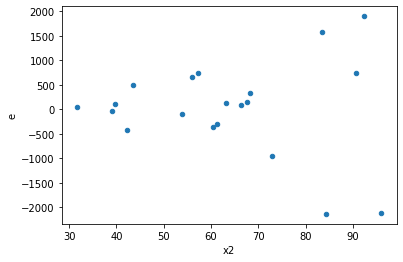

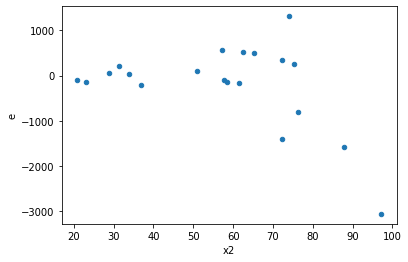

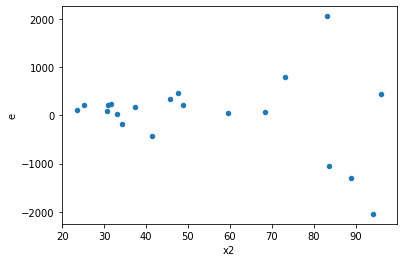

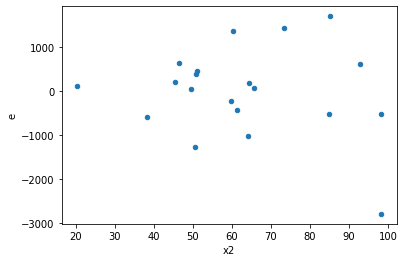

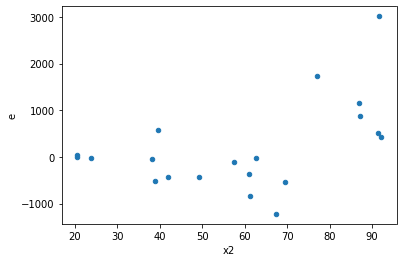

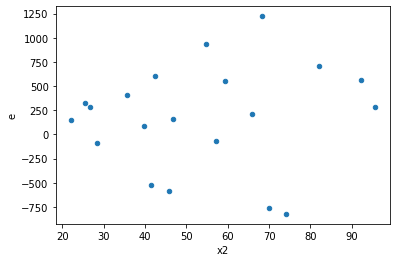

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,8.0,3095643.5869122217,12728065.98639656,773910.8967280554,1591008.24829957,2.0558028773416206,0.3580381394047587,0.8209809302976206,0.17901906970237935,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,58718.316129765415,1569213.0251197177,9786.38602162757,261535.50418661963,26.724421416510175,0.0008884729214087006,0.9995557635392956,0.0004442364607043503,Reject001=0 : Heteroscedasticity
4.0,5.0,7.0,984593.5727051857,6663101.108475569,196918.71454103716,951871.5869250812,4.833829984842373,0.06252458135194394,0.968737709324028,0.03126229067597197,Reject001=1 : Homoscedasticity
5.0,5.0,7.0,137616.80278742636,1615728.692153364,27523.360557485274,230818.38459333772,8.386271876620974,0.014404806376193235,0.9927975968119034,0.007202403188096618,Reject001=1 : Homoscedasticity
9.0,5.0,7.0,233912.2472064846,1862902.3809377064,46782.44944129692,266128.9115625295,5.6886485154324955,0.041403713975531886,0.9792981430122341,0.020701856987765943,Reject001=1 : Homoscedasticity
10.0,7.0,5.0,2474789.1644109744,3498568.90870069,353541.3092015678,699713.7817401381,1.9791570702737986,0.46980787420141934,0.7650960628992903,0.23490393710070967,Reject001=1 : Homoscedasticity
11.0,7.0,5.0,1810006.9796933327,2594551.32948312,258572.4256704761,518910.26589662395,2.0068275437765415,0.4605762591674487,0.7697118704162756,0.23028812958372435,Reject001=1 : Homoscedasticity
14.0,5.0,7.0,2628683.3176974915,10566065.44239605,525736.6635394983,1509437.9203422929,2.8710912230850902,0.20172263178027827,0.8991386841098609,0.10086131589013914,Reject001=1 : Homoscedasticity
15.0,8.0,4.0,1995624.1504028954,1208834.3926201963,249453.01880036193,302208.5981550491,1.2114850307620755,0.9111090376995747,0.5444454811502126,0.45555451884978737,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,5.0,3259956.449990911,465446.9792739948,465708.06428441586,93089.39585479896,0.19988787610503495,0.05741194206413583,Reject001=1 : Homoscedasticity
1.0,4.0,8.0,3095643.5869122217,12728065.98639656,773910.8967280554,1591008.24829957,2.0558028773416206,0.3580381394047587,Reject001=1 : Homoscedasticity
2.0,7.0,5.0,2634653.073697942,1332582.2641707116,376379.01052827743,266516.4528341423,0.7081065770911762,0.6531106232908305,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,58718.316129765415,1569213.0251197177,9786.38602162757,261535.50418661963,26.724421416510175,0.0008884729214087006,Reject001=0 : Heteroscedasticity
4.0,5.0,7.0,984593.5727051857,6663101.108475569,196918.71454103716,951871.5869250812,4.833829984842373,0.06252458135194394,Reject001=1 : Homoscedasticity
5.0,5.0,7.0,137616.80278742636,1615728.692153364,27523.360557485274,230818.38459333772,8.386271876620974,0.014404806376193235,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,4981308.992879714,493047.3300163931,830218.1654799524,82174.55500273219,0.09897947120348391,0.01270869338498309,Reject001=1 : Homoscedasticity
7.0,14.0,1.0,5630344.692831619,5.635167923017501e-24,402167.4780594013,5.635167923017501e-24,1.4011993088573836e-29,4.683310868398683e-195,Reject001=0 : Heteroscedasticity
8.0,5.0,7.0,2392534.2729123924,1254142.246120299,478506.85458247847,179163.17801718556,0.37442134067967436,0.296982967375276,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      745
Reject001=0 : Heteroscedasticity    255
Name: Result_test, dtype: int64